This is problem 1.

We thought that regression can be used to predict what search topics could be trending in the future, classification could be used to classify queries as interrogative (which could lead to a different machine learning model, a la Google), and anomaly detection could be used to deter hackers and unethical spammers.

This is problem 2.

We are given a sequence of N iid random variables with the exponential distribution $f_{X}(x) = \lambda e^{-\lambda x}$. We are trying to find the maximum likelihood estimate for $\lambda$. Because the terms of this sequence are independent, we know that the likelihood function must equal the product of their densities:

$$ L(x_1, x_2, ..., x_i, ..., x_N|\lambda) = \prod_{i=1}^{N} f_{X}(x_i|\lambda) $$

We can rewrite this as:

$$ \lambda^{N}exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg). $$

Now, we can find the log-likelihood function by taking the natural log of that equation:

$$ ln(L(x_1, x_2, ..., x_i, ..., x_N | \lambda))
= ln(\lambda^{N}exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg))\\
= ln(\lambda^{N}) + ln(exp\bigg(-\lambda \sum_{i=1}^{N}x_i\bigg))\\
= Nln(\lambda) - \lambda \sum_{i=1}^{N}x_i $$

We can now maximize the log likelihood by taking the derivative of the above equation and setting it equal to zero to get our maximum likelihood estimate for $\lambda$:

$$ \frac{d}{dx}ln(L(x_1, x_2, ..., x_i, ..., x_N | \lambda)) = 0\\
\frac{d}{dx}(Nln(\lambda) - \lambda \sum_{i=1}^{N}x_i = 0\\
\frac{N}{\lambda} - \sum_{i=1}^{N}x_i = 0\\
\frac{N}{\lambda} = \sum_{i=1}^{N}x_i\\
\lambda = \frac{N}{\sum_{i=1}^{N}x_i} $$

This is problem 3.

Suppose X and Y are two random variables whose joint distribution is Normal (Gaussian), centered at
(0,0) and with correlation . (See \Bivariate Case" in the Wikipedia entry for \Multivariate Normal
Distribution" for the equation, or use just use the vector form given in the class notes, with 12 =
21 = xy). Consider 2 cases

i) 2x
= 4; 2
y = 9;  = 0
ii)2x
= 4; 2
y = 9;  = 0:5

In [20]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal

%matplotlib inline

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)

# Get current dpi
fig_dpi = plt.rcParams["figure.dpi"]
print("Current dpi:", fig_dpi)

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
# Set save figure dpi to something higher
# Note - this is the one that actually works
# It seems that ipython notebook renders all plots with savefig()
# as opposed to show()
mpl.rcParams['savefig.dpi']=300 


Current size: [6.0, 4.0]
Current dpi: 80.0


TypeError: Length of x must be number of columns in z.

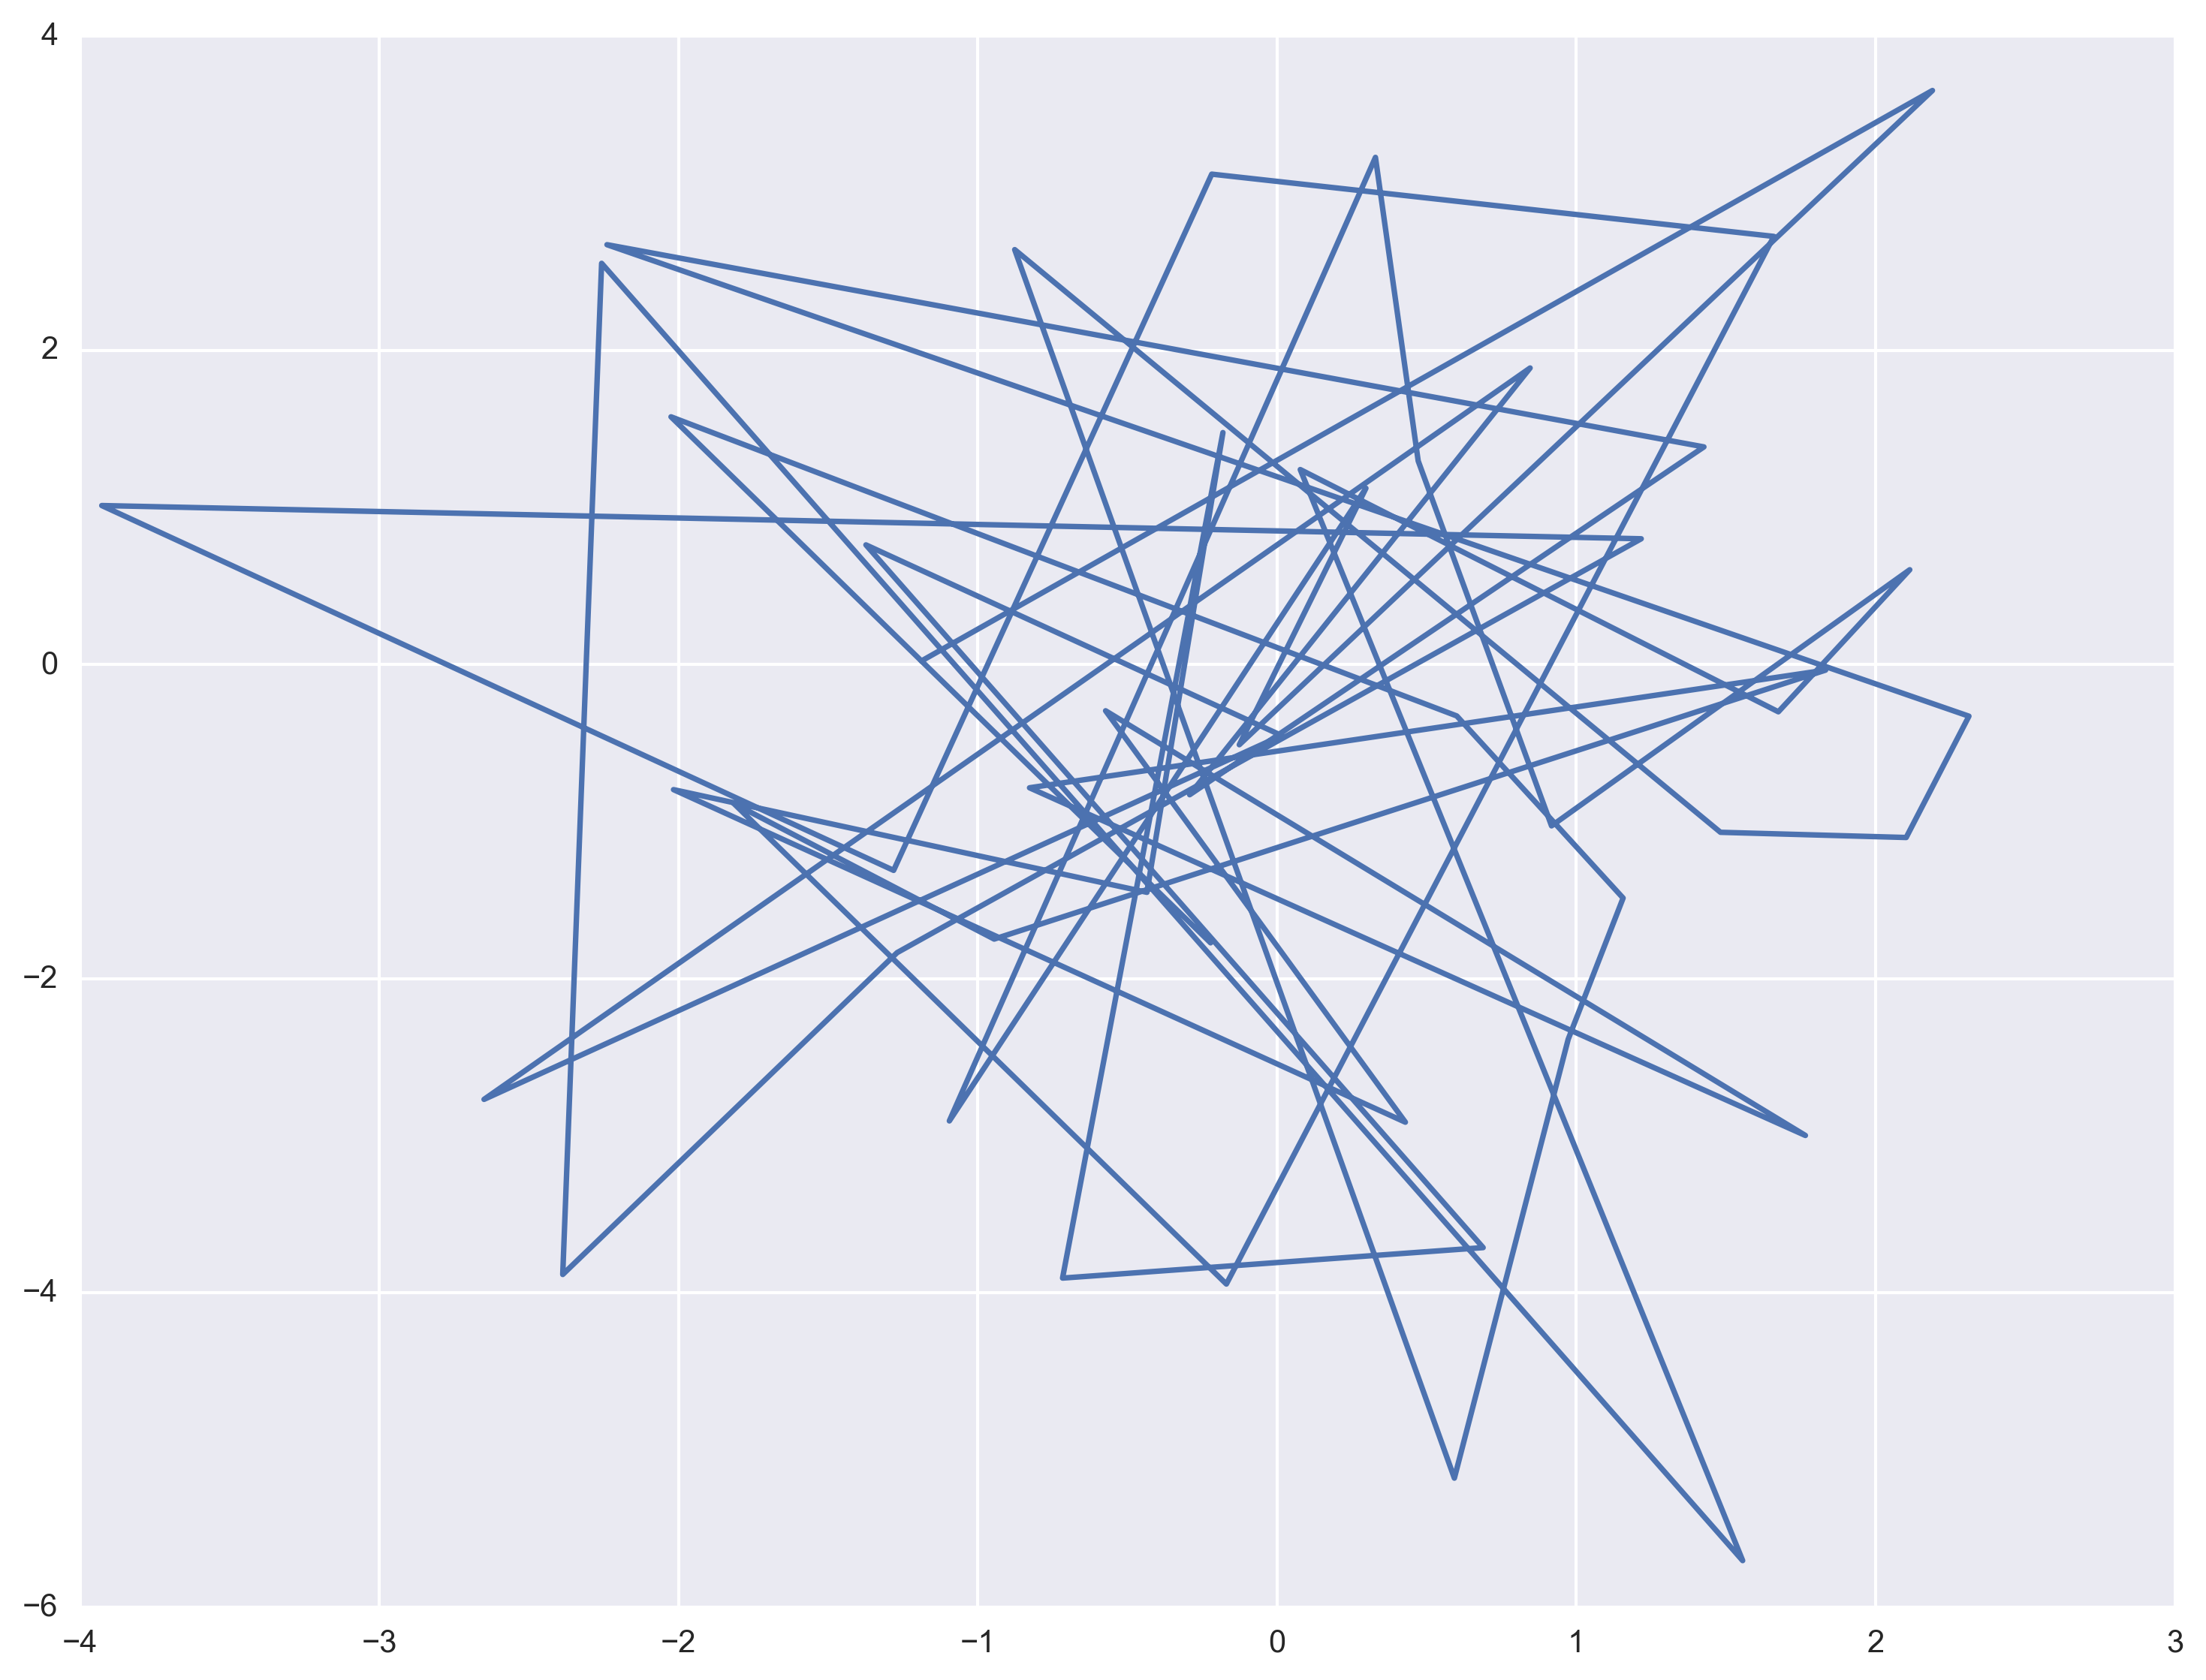

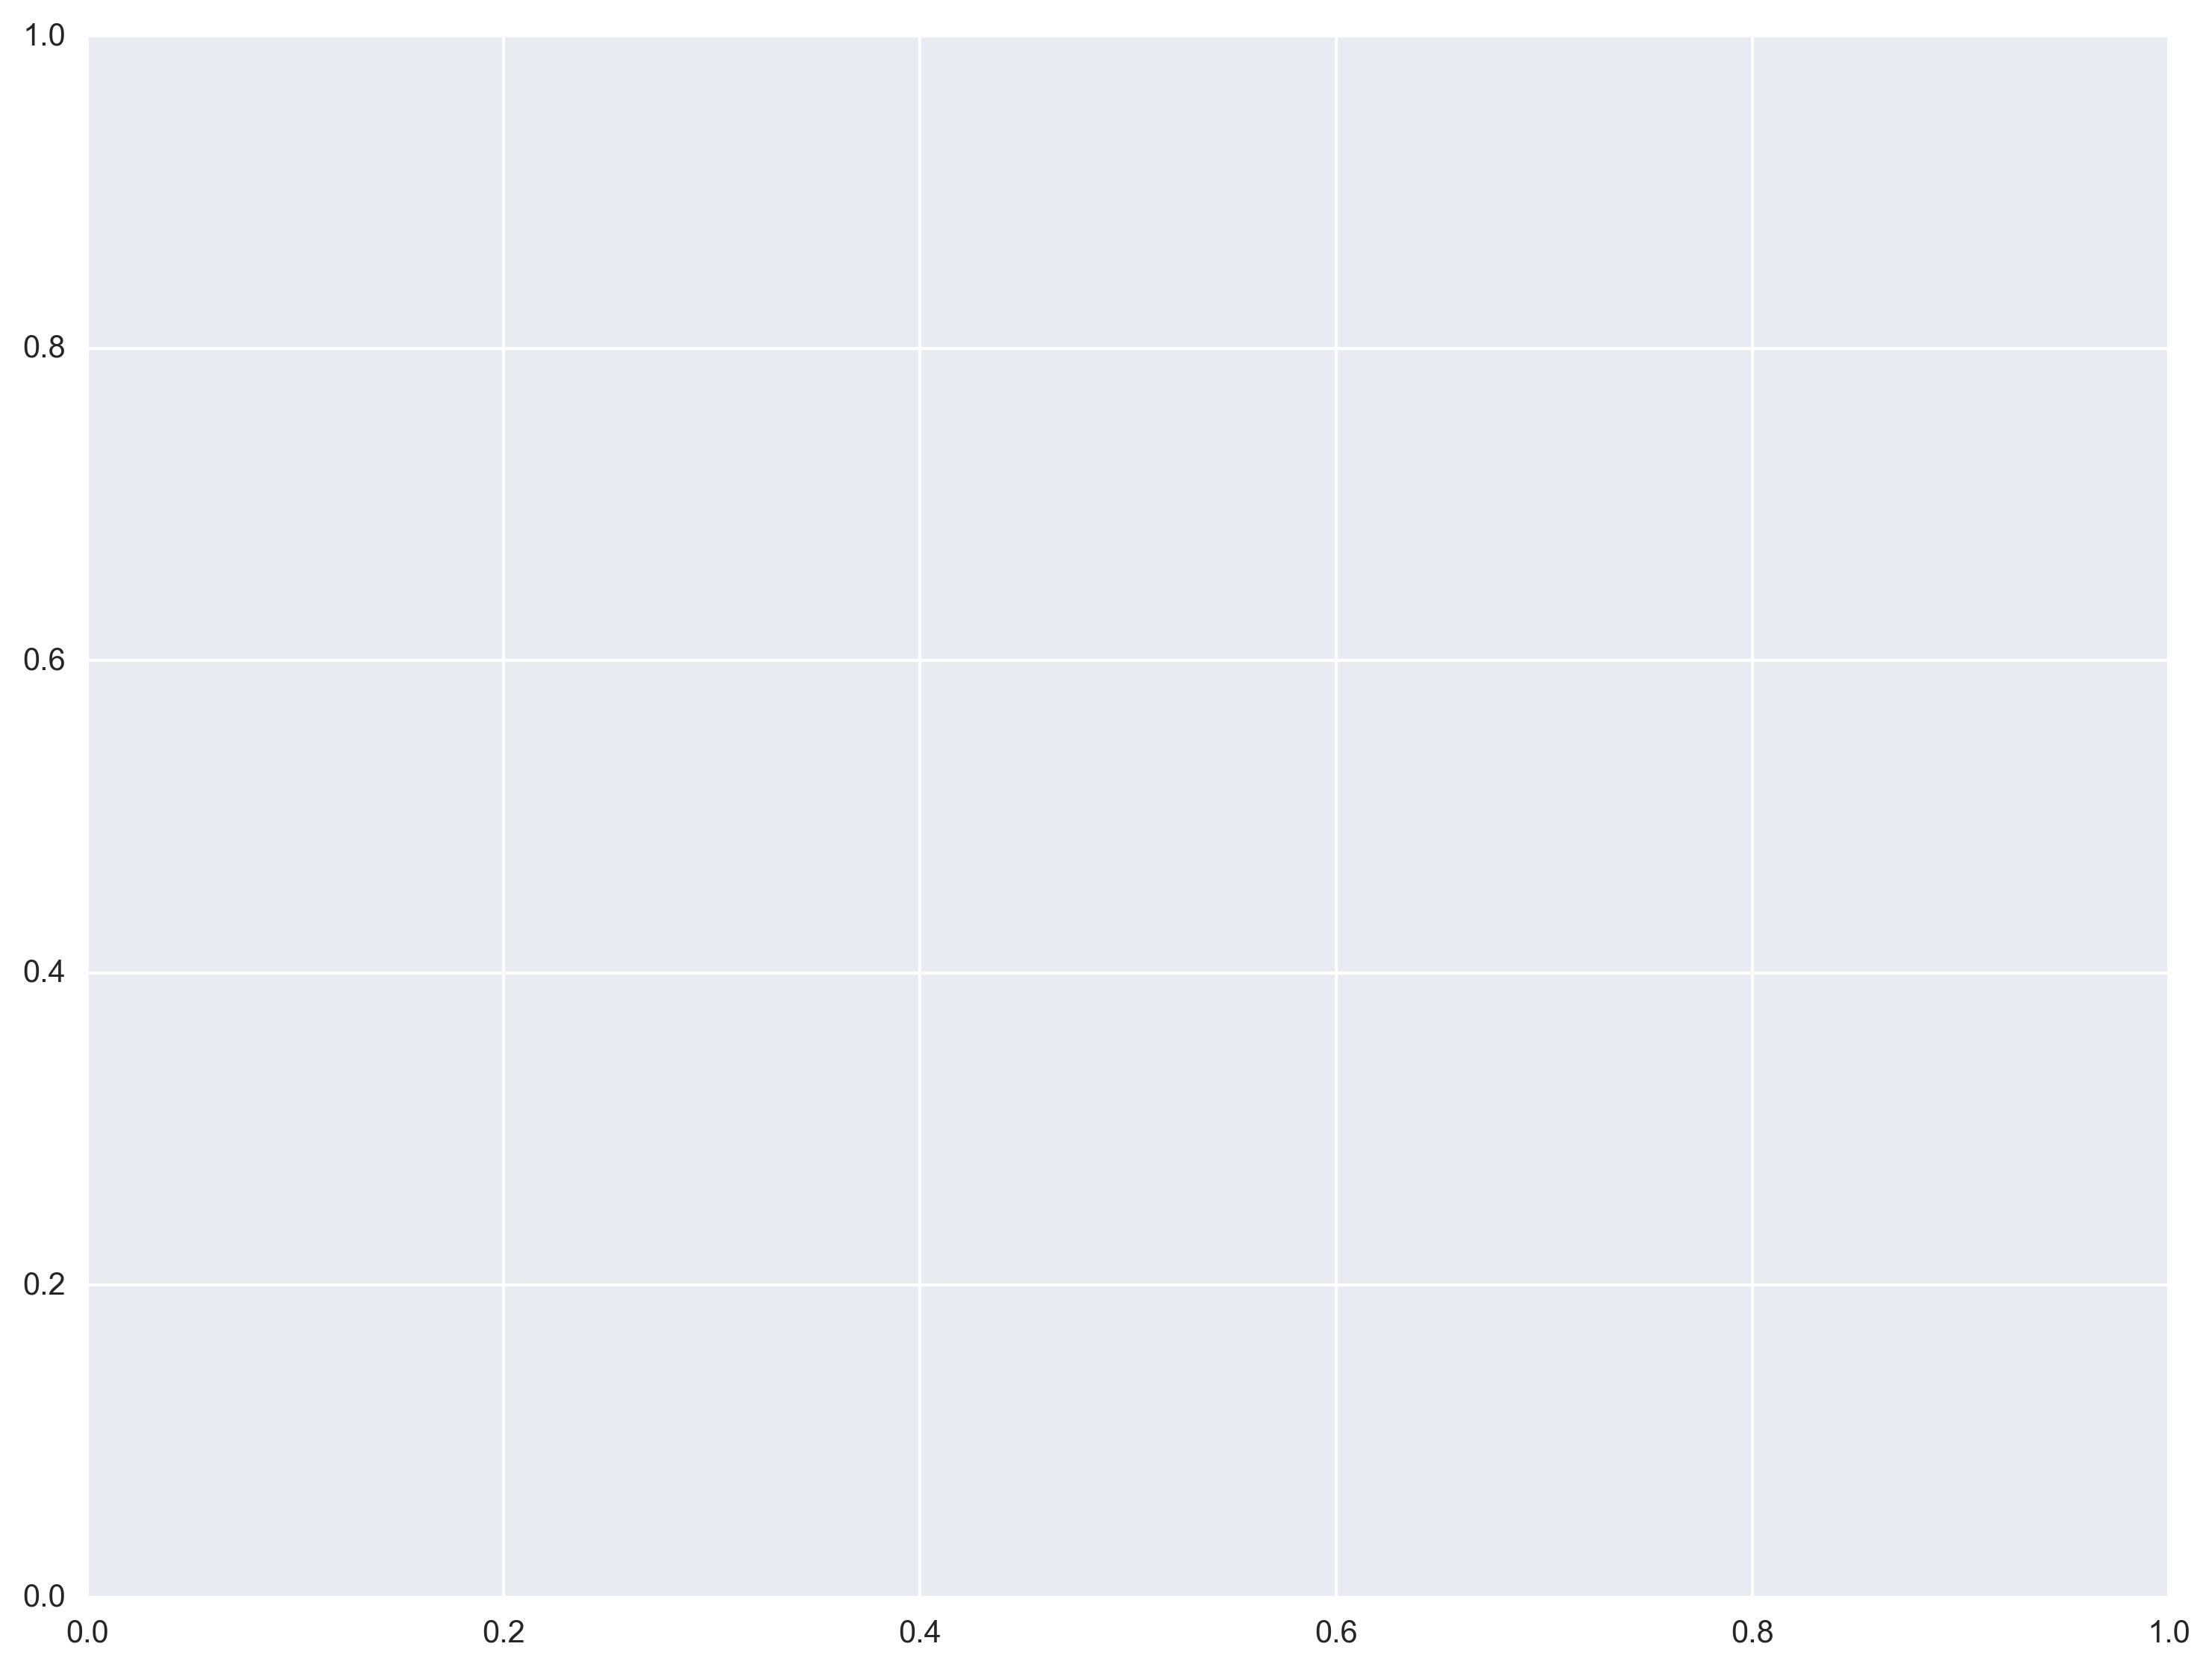

In [24]:
# 3a, part i

# means = 0, var_x = 4, var_y = 9, correlation coefficient = 0
u_x = 0
u_y = 0
var_x = 4
var_y = 9
std_x = var_x**(1/2)
std_y = var_y**(1/2)
rho = 0

def plot_contours():
    # Covariance matrix
    mean = [u_x, u_y]
    cov = [(var_x, std_x * std_y * rho),
           (std_x * std_y * rho, var_y)]

    x, y = np.random.multivariate_normal(mean, cov, size=50).T
#     ax = sns.kdeplot(x, y)
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    ax.plot(x, y)
    xc = np.arange(-3.0, 3.0, 0.1)
    yc = np.arange(-3.0, 3.0, 0.1)
    X, Y = np.meshgrid(xc, yc)

    
plot_contours()


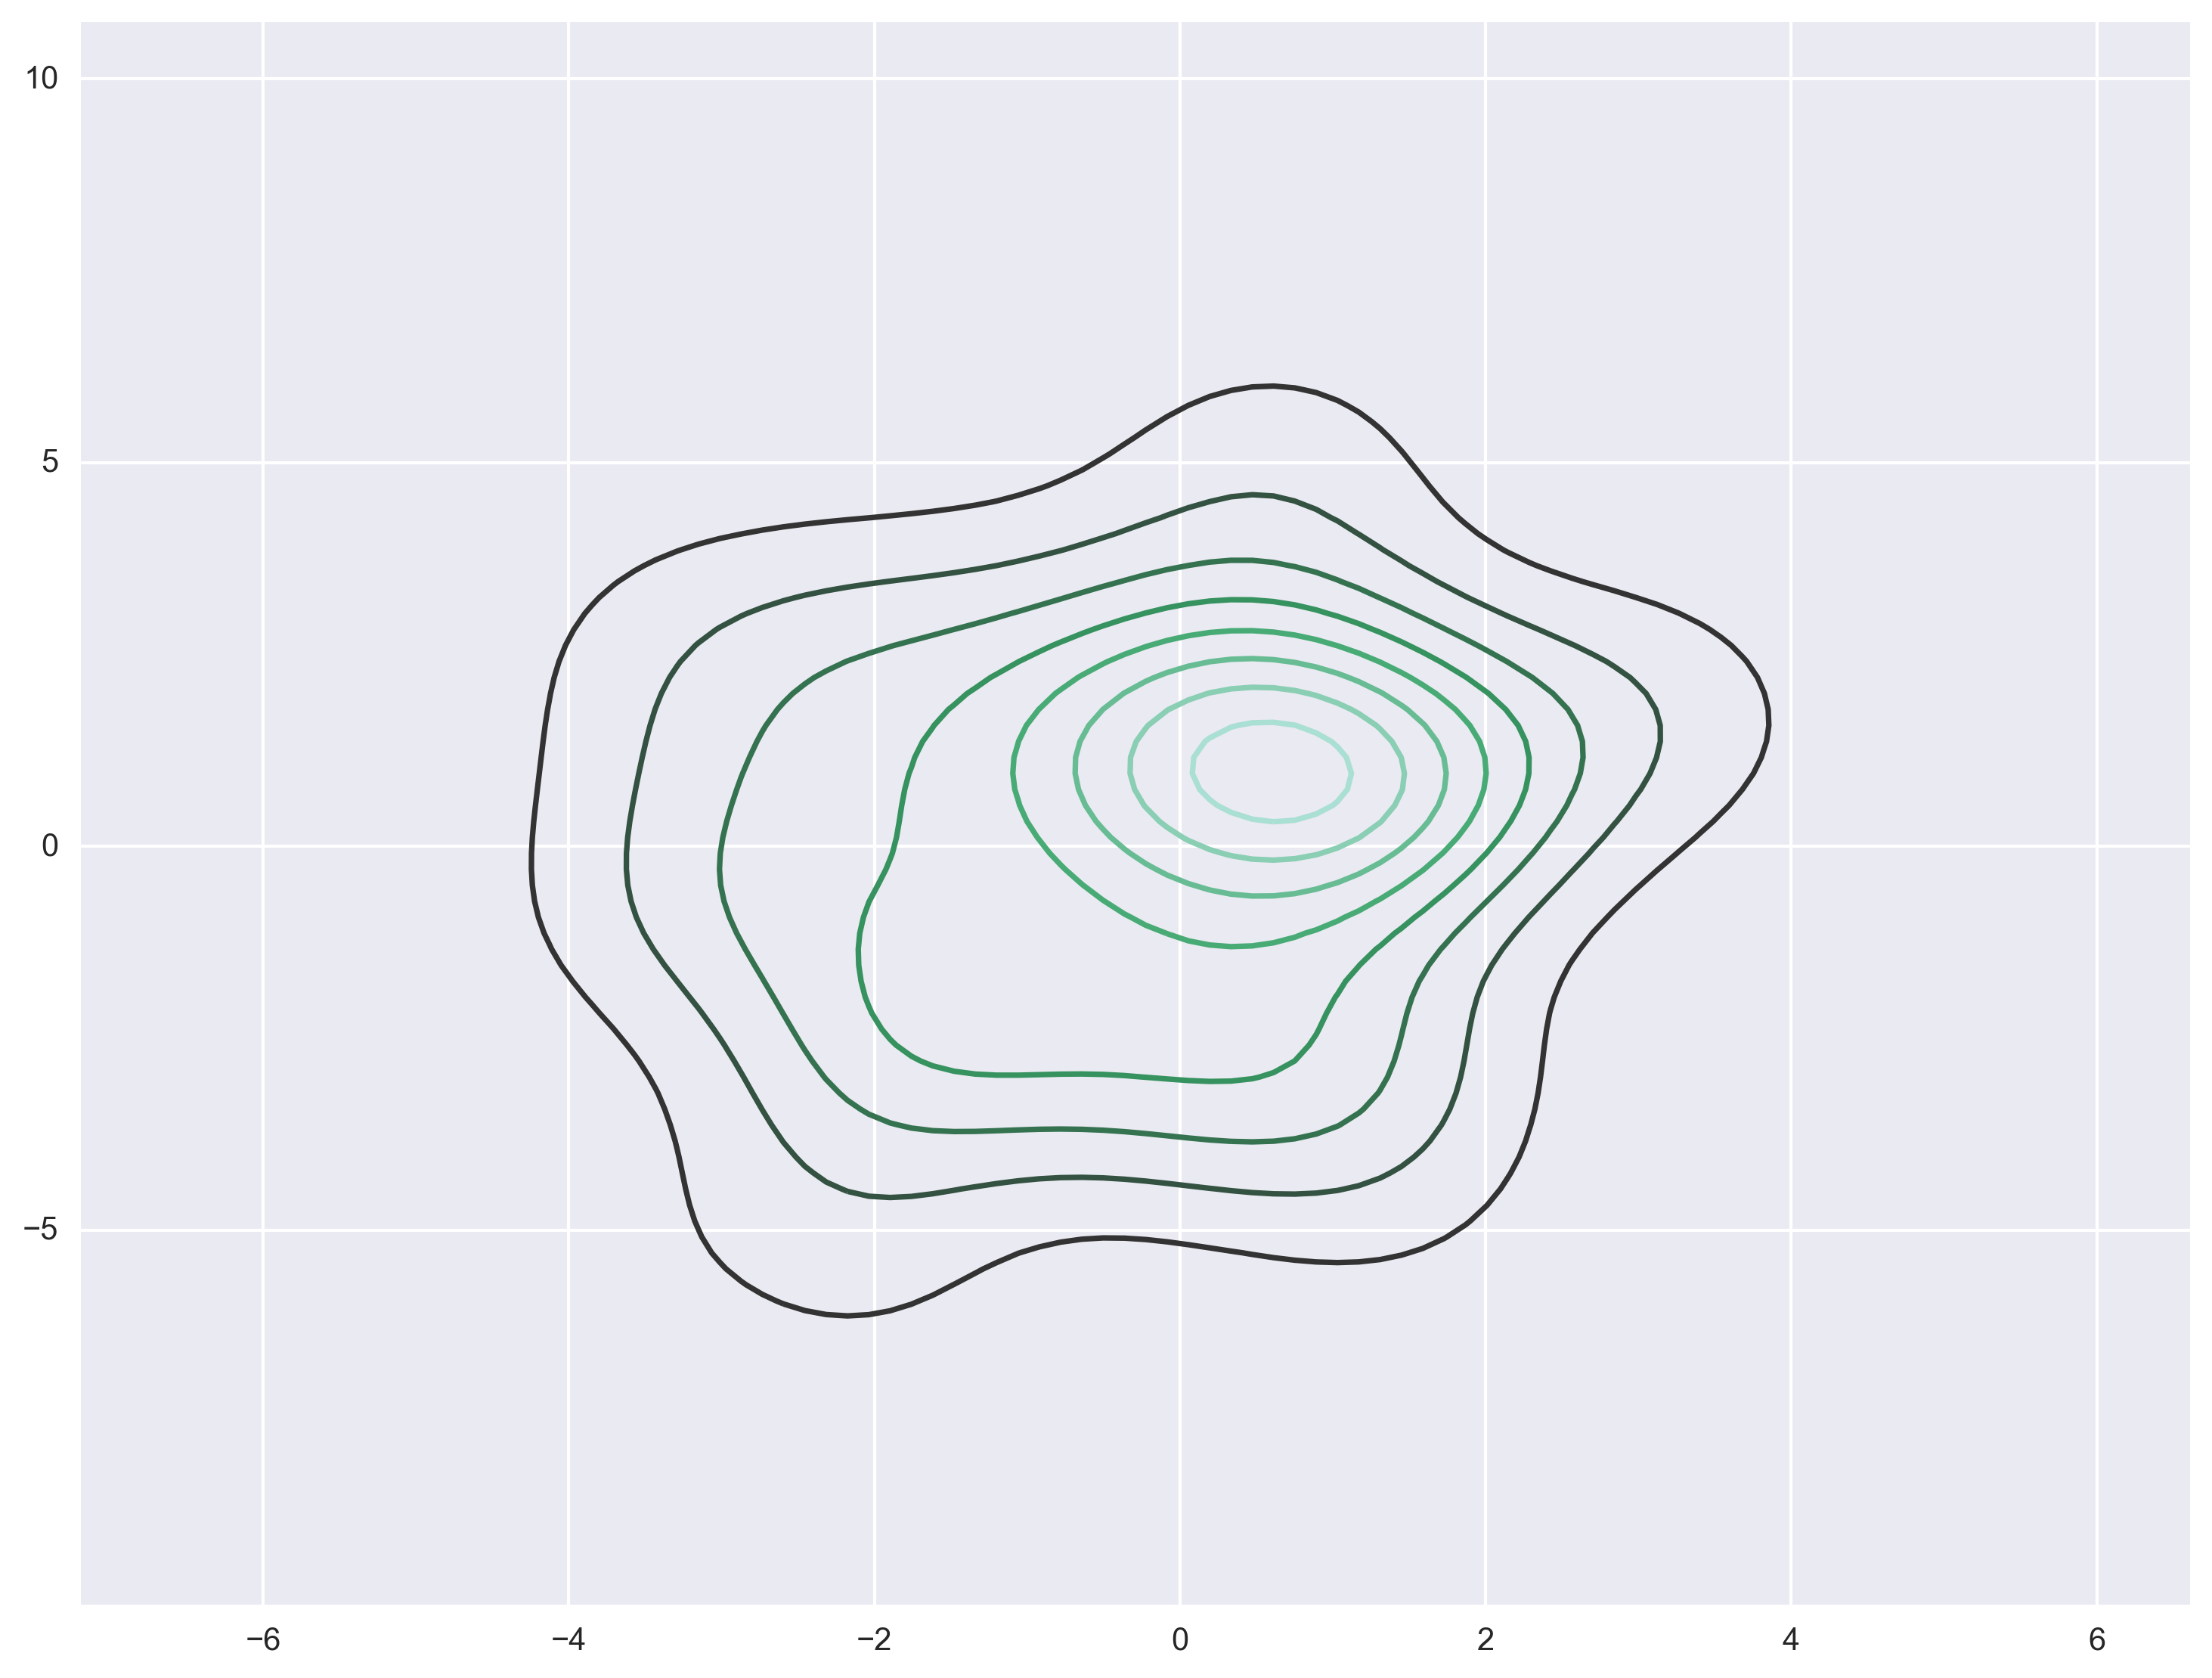

In [17]:
# 3a, part ii

# means = 0, var_x = 4, var_y = 9, correlation coefficient = 0.5
rho = 0.5

plot_contours()

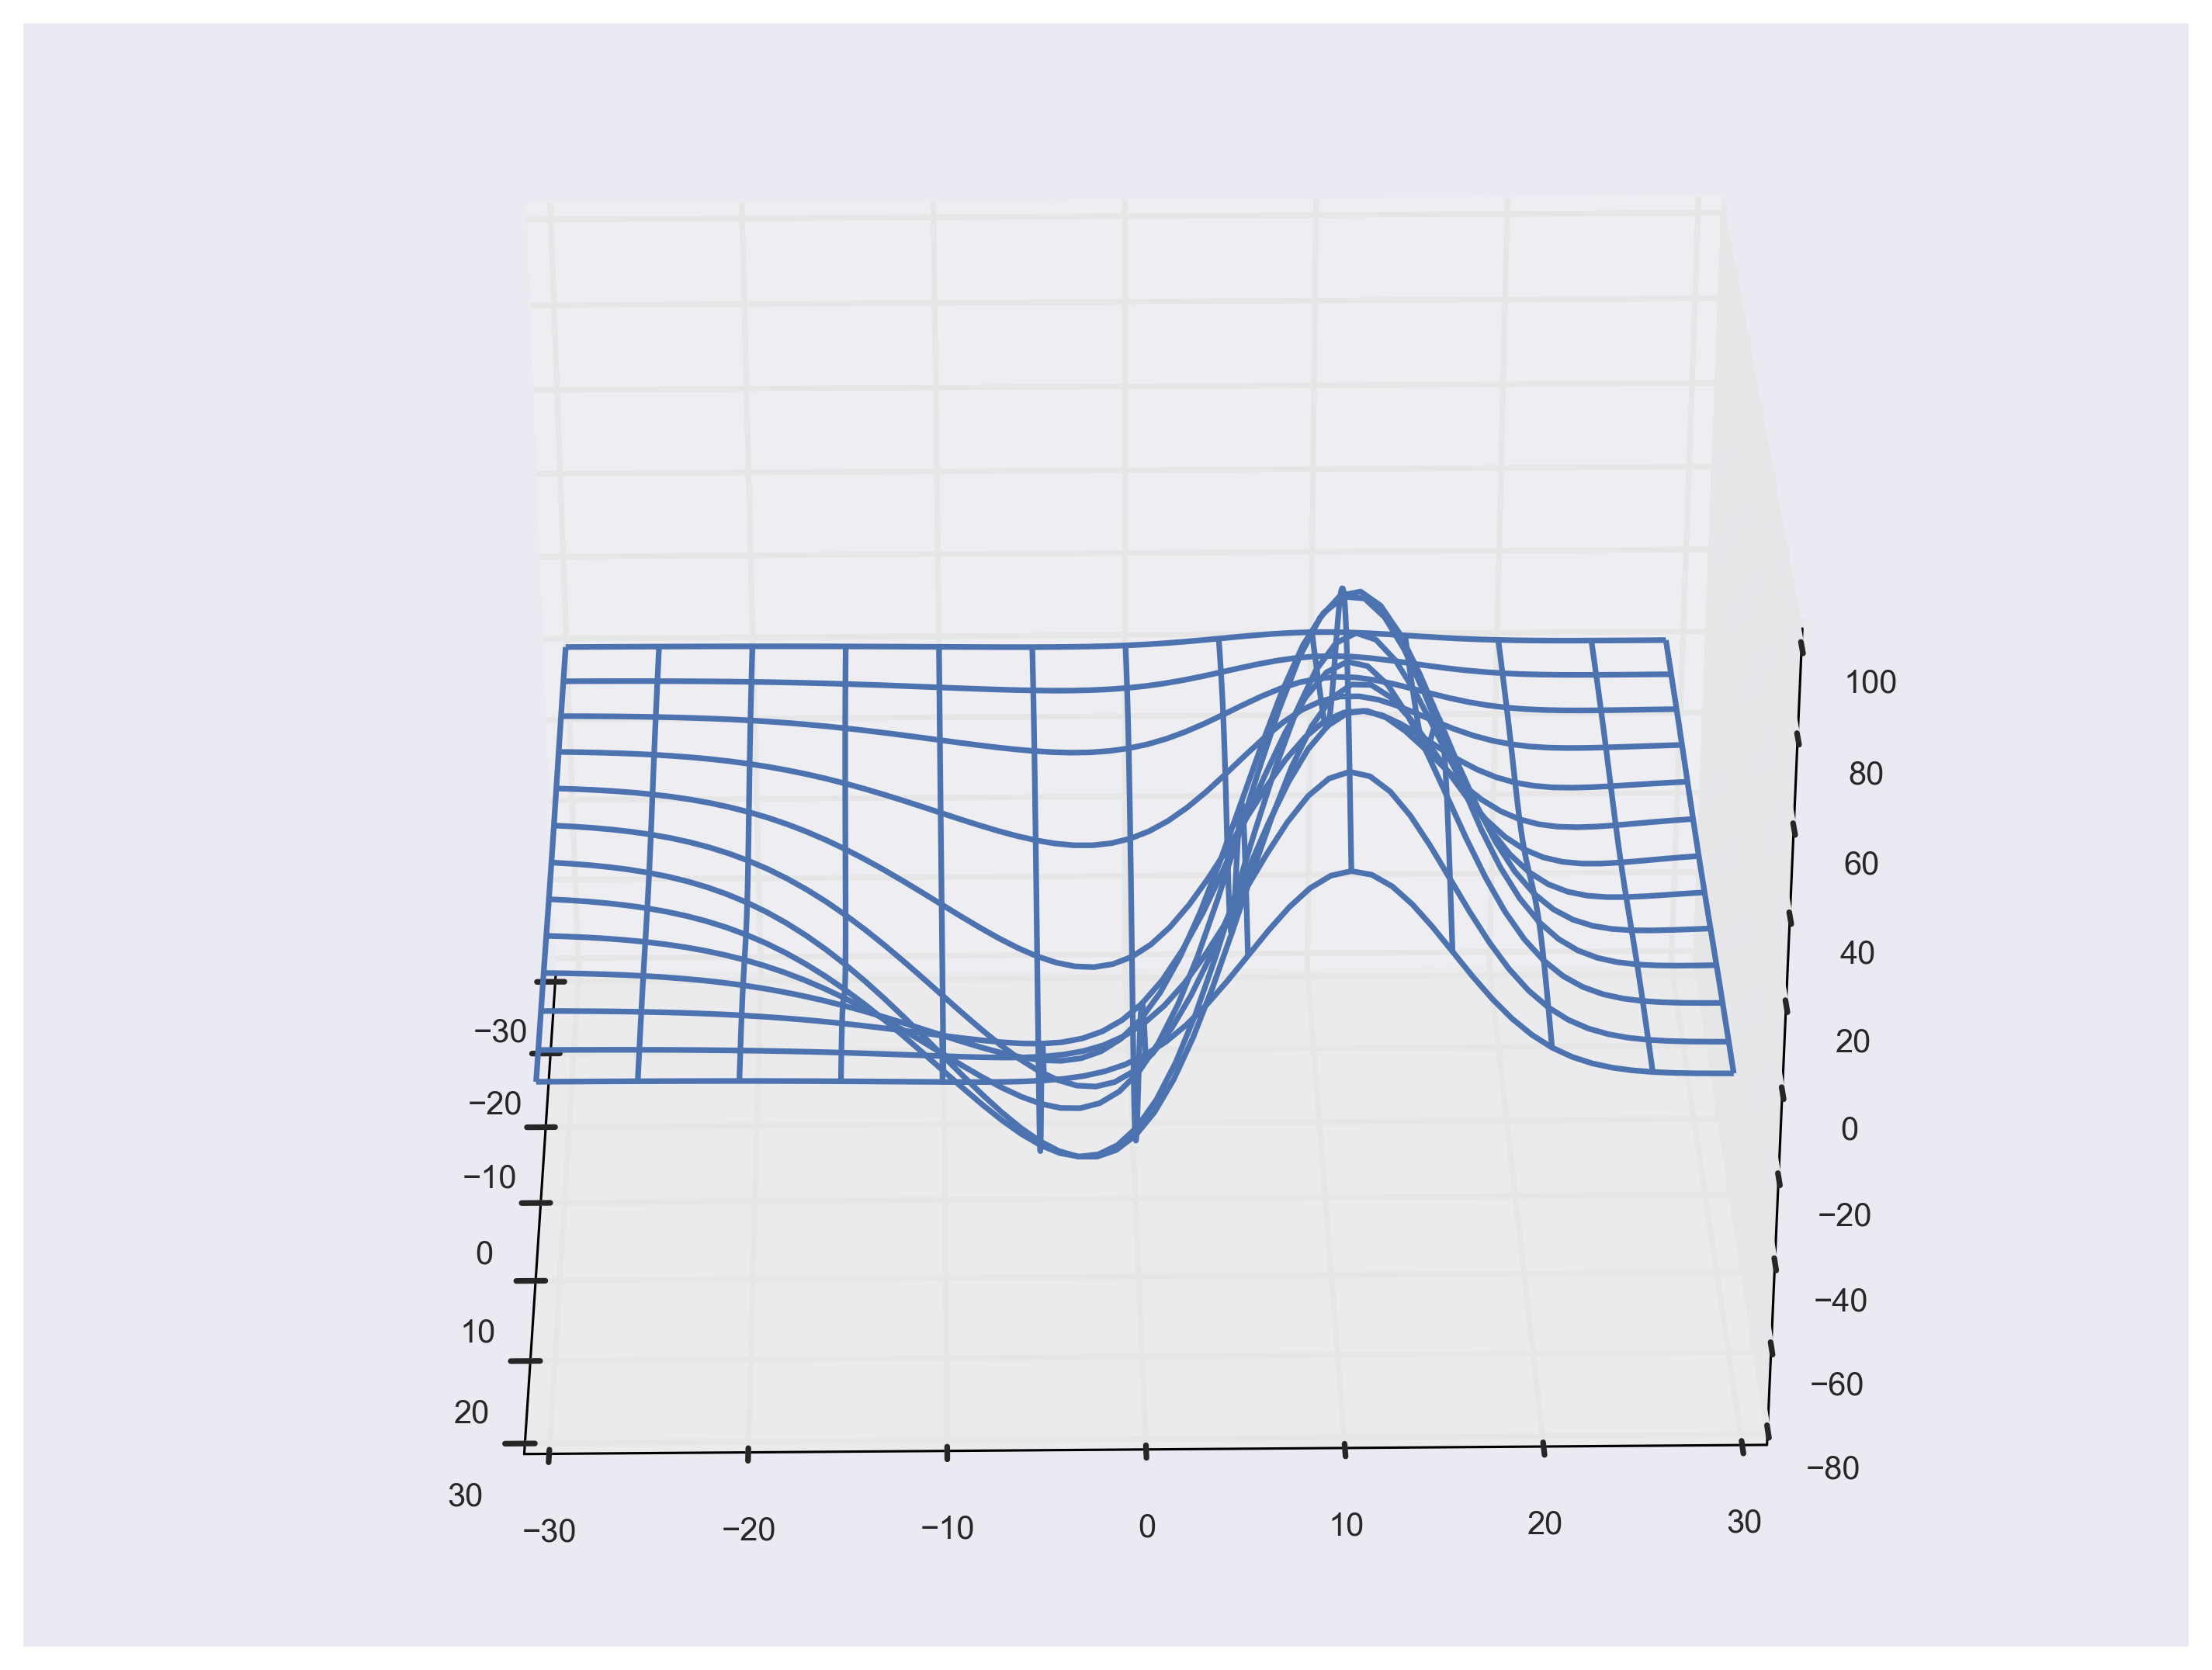

In [16]:
# Problem 3b

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()

In [19]:
x, y= np.random.multivariate_normal(mean, cov, size=50).T
print(x)
print(y)

[ 0.17826237  1.42254485  0.10110678 -0.21402437  0.44306837 -1.30027949
 -0.49427931  2.91229524  3.82745534  0.24602615 -1.32077312 -1.46749667
 -0.0225805  -1.88534134 -0.29561926 -0.21839625  3.36421115 -0.97256638
  1.59861     0.12525373  1.19277378  3.35724831 -1.18921679 -1.23174896
 -1.04347942 -1.47490654  0.39842806  0.10870853 -2.66035467 -1.35767539
 -0.32785597  0.0394185  -0.35618315 -0.14992669  1.93921094  0.59593001
  3.17538536 -3.38389977 -2.53848726  0.84910076 -0.07566093 -1.76522598
  3.08914928  0.51159445  0.64507321 -0.17330545  1.0272718  -0.60729
  1.32667196 -1.74099291]
[-1.69132585  3.81361949 -0.81252414 -6.03375778  0.93213074 -2.08586734
 -0.12043845  1.19304623  2.09578673 -1.44905427  2.73121611  1.83286389
 -0.2407772  -1.60170601 -0.98082652 -0.51639823 -3.12137907 -3.19354427
 -1.70588864  2.34430738 -5.48257341  4.93106993 -3.93297625 -4.02741604
 -0.10056749 -2.5634156  -1.25089663 -1.74304436 -2.39086554  1.49121872
 -7.69420893 -3.31011432 -3.